In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
data_dir = '/content/drive/MyDrive/Deep Learning/dataset'

## Create Dataset

In [29]:
batch_size = 50
img_height = 180
img_width = 180

In [30]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Deep Learning/dataset',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 50 files belonging to 5 classes.
Using 40 files for training.


In [31]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Deep Learning/dataset',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 50 files belonging to 5 classes.
Using 10 files for validation.


In [32]:
class_names = train_ds.class_names
print(class_names)

['audi', 'fortuner', 'hyundai', 'mercedes', 'volkswagon']


## Visualize The Data

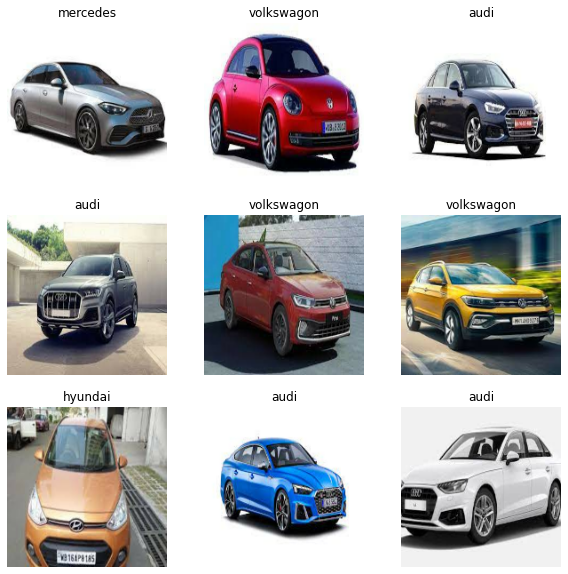

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [34]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(40, 180, 180, 3)
(40,)


## A Basic Keras model

In [35]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile The Model

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model Summary

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

## Train The Model

In [39]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
1/1 [==============================] - 0s 128ms/step - loss: 0.0348 - accuracy: 1.0000 - val_loss: 2.2133 - val_accuracy: 0.3000
Epoch 2/15
1/1 [==============================] - 0s 173ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 2.4113 - val_accuracy: 0.2000
Epoch 3/15
1/1 [==============================] - 0s 185ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 2.7052 - val_accuracy: 0.2000
Epoch 4/15
1/1 [==============================] - 0s 199ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 3.0316 - val_accuracy: 0.2000
Epoch 5/15
1/1 [==============================] - 0s 200ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 3.3052 - val_accuracy: 0.2000
Epoch 6/15
1/1 [==============================] - 0s 196ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.5031 - val_accuracy: 0.2000
Epoch 7/15
1/1 [==============================] - 0s 165ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.6327 - val_accuracy: 0.2000
Epoch 8/15
1/1 [====

## Visualize The Training Result

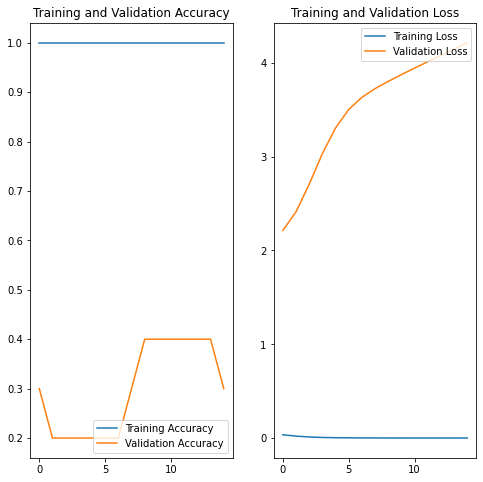

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict On New Data

In [41]:
fortuner_path = '/content/download (0).jpg'

In [43]:
img = tf.keras.utils.load_img(
    fortuner_path, target_size=(img_height, img_width)
)

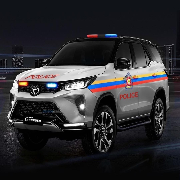

In [44]:
img

In [45]:
type(img)

PIL.Image.Image

In [46]:
img_array = tf.keras.utils.img_to_array(img)

In [47]:
img_array

array([[[16., 19., 24.],
        [16., 19., 24.],
        [16., 19., 24.],
        ...,
        [16., 19., 24.],
        [16., 19., 24.],
        [18., 19., 24.]],

       [[16., 19., 24.],
        [16., 19., 24.],
        [16., 19., 24.],
        ...,
        [16., 19., 24.],
        [16., 19., 24.],
        [16., 19., 24.]],

       [[16., 19., 24.],
        [16., 19., 24.],
        [16., 19., 24.],
        ...,
        [16., 19., 24.],
        [16., 19., 24.],
        [16., 19., 24.]],

       ...,

       [[ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        ...,
        [ 5.,  5.,  5.],
        [ 6.,  6.,  6.],
        [ 5.,  6., 11.]],

       [[ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        ...,
        [ 6.,  6.,  6.],
        [ 6.,  6.,  8.],
        [ 4.,  5., 10.]],

       [[ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        ...,
        [ 6.,  6.,  6.],
        [ 6.,  6.,  8.],
        [ 4.,  5., 10.]]

In [48]:
img_array.shape

(180, 180, 3)

In [49]:
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [50]:
img_array.shape

TensorShape([1, 180, 180, 3])

In [51]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 251ms/step
This image most likely belongs to fortuner with a 88.63 percent confidence.


In [52]:
predictions

array([[ 4.48382  , 13.48425  , -5.932815 , 10.4871645, 10.935856 ]],
      dtype=float32)